In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (np.asarray(list(a)) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1_array = np.asarray(v_err1)

print(nf.d_F(1.1,nf.h_c,nf.drho00_c,pref=1))

../python\NGC5533_functions.py:304: RuntimeWarning: overflow encountered in cosh
  return d_durho0(r, h, d_rho00)*np.power(np.cosh(z/z0(h)), -2)


-14242.83232278033


C:\Users\Cirdan\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [3]:
def f(r,M,rc,rho00):
    return np.sqrt(nf.bh_v(r,M)**2 + nf.h_v(r,rc,rho00)**2)

#def f(r,c):
#    return np.sqrt(c*nf.b_v(r,load=True)**2)

In [4]:
#Setup
weighdata = 1/v_err1
l_mod = lm.Model(f)
params = l_mod.make_params()
#Black Hole
params.add('M', value=nf.Mbh_def, min=0) #Mass
#Bulge
#params.add('c', value=1, min=0)          #Contributions should all add
#params.add('n', value=nf.n_c, min=0) 
#params.add('re', value=nf.re_c, min=0) 
#Disk
#params.add('h', value=nf.h_c, min=0, max=1000)
#params.add('d_rho00', value=nf.drho00_c, min=0, max=1000)
#params.add('pref', value=nf.pref_def, min=0, max=1000)
#Halo
params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
params.add('rho00', value=nf.hrho00_c, min=0) #Density (halo)

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

#Define Stuff
l_dict = l_fit.best_values
l_M = l_dict['M']
l_rc = l_dict['rc']
l_hrho00 = l_dict['rho00']
#l_h = l_dict['h']
#l_drho00 = l_dict['d_rho00']
#l_pref = l_dict['pref']
#l_c = l_dict['c']
#l_n = l_dict['n']
#l_re = l_dict['re']

l_curve = np.sqrt(nf.bh_v(r_dat,l_M)**2 + nf.h_v(r_dat,l_rc,l_hrho00)**2)
#l_curve = np.sqrt(l_c*nf.b_v(r_dat,load=True)**2)

#b_curve = l_c*nf.b_v(r_dat,load=True)        #Bulge
#d_curve = nf.d_v(r_dat,l_h,l_drho00,l_pref,load=True) #Disk
#bh_curve = nf.bh_v(r_dat,l_M)                         #Black Hole
#h_curve = nf.h_v(r_dat,l_rc,l_hrho00,load=True)       #Halo
#nodisk = np.sqrt(nf.bh_v(r_dat,l_M,load=True)**2 + nf.h_v(r_dat,l_rc,l_hrho00,load=True)**2 + l_c*nf.b_v(r_dat,l_n,l_re,load=True)**2)

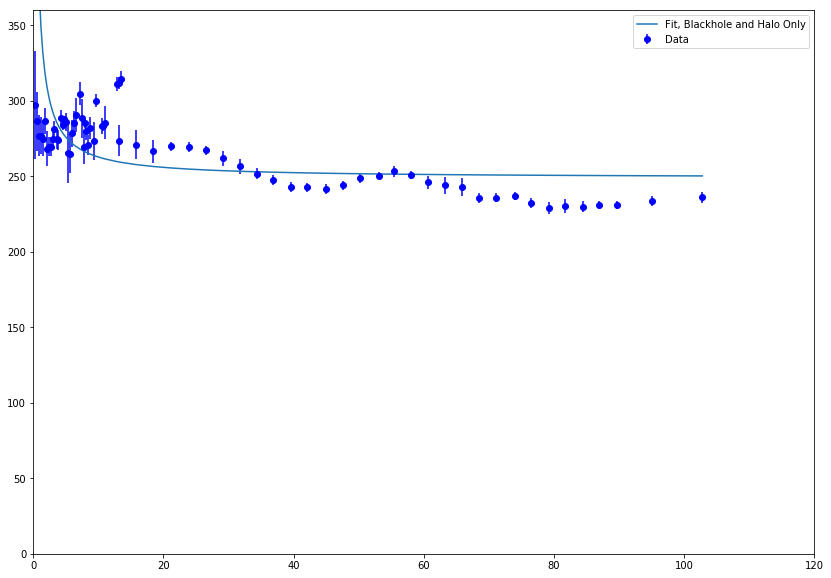

In [49]:
fig = plt.figure(figsize=(14.0,10.0))

halo1 = np.linspace(0,20)
halo2 = np.linspace(0,120)

plt.xlim(0,120)
plt.ylim(0,360)
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='Fit, Blackhole and Halo Only')
#plt.plot(r_dat,d_curve,label='Disk Fit')
#plt.plot(r_dat,nf.d_v(r_dat,nf.h_c,nf.drho00_c,pref=1),label='Disk: Our calculations')
#plt.plot(r_dat,nodisk,label='No Disk')
#plt.plot(r_dat,b_curve,label='Bulge Only')
#plt.plot(r_dat,bh_curve,label='Black Hole Only')
#plt.plot(r_dat,h_curve,label='Halo Only')
'''
fig, axs = plt.subplots(1, 2)
#fig.suptitle('Horizontally stacked subplots')
axs[0].plot(r_dat, l_curve)
plt.xlim(0,120)
plt.ylim(0,360)
axs[0].plot.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
axs[1].plot(r_dat, l_curve)
plt.xlim(0,20)
plt.ylim(0,360)
plt.ylim(0,360)
'''
plt.legend()
plt.show()

l_fit

### Necessary to use matplotlib widget, which is required for interactive stuff, in jupyterlab:

```
pip install ipympl

# If using JupyterLab
# Install nodejs: https://nodejs.org/en/download/
jupyter labextension install @jupyter-widgets/jupyterlab-manager
jupyter labextension install jupyter-matplotlib
```

These are the instructions on the extension's github page: https://github.com/matplotlib/jupyter-matplotlib
but they did not work for me :( It's no longer an image but they are unresponsive.